E:\Anaconda\installation\envs\tracker_flow1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/10], Step [100/938], Loss: 1.9520
Epoch [1/10], Step [200/938], Loss: 1.8039
Epoch [1/10], Step [300/938], Loss: 1.8312
Epoch [1/10], Step [400/938], Loss: 1.7281
Epoch [1/10], Step [500/938], Loss: 1.7368
Epoch [1/10], Step [600/938], Loss: 1.7146
Epoch [1/10], Step [700/938], Loss: 1.7009
Epoch [1/10], Step [800/938], Loss: 1.6937
Epoch [1/10], Step [900/938], Loss: 1.6893
Epoch [2/10], Step [100/938], Loss: 1.6965
Epoch [2/10], Step [200/938], Loss: 1.6695
Epoch [2/10], Step [300/938], Loss: 1.6532
Epoch [2/10], Step [400/938], Loss: 1.6541
Epoch [2/10], Step [500/938], Loss: 1.6545
Epoch [2/10], Step [600/938], Loss: 1.7215
Epoch [2/10], Step [700/938], Loss: 1.6696
Epoch [2/10], Step [800/938], Loss: 1.6921
Epoch [2/10], Step [900/938], Loss: 1.6817
Epoch [3/10], Step [100/938], Loss: 1.6550
Epoch [3/10], Step [200/938], Loss: 1.6320
Epoch [3/10], Step [300/938], Loss: 1.5962
Epoch [3/10], Step [400/938], Loss: 1.6510
Epoch [3/10], Step [500/938], Loss: 1.6630
Epoch [3/10

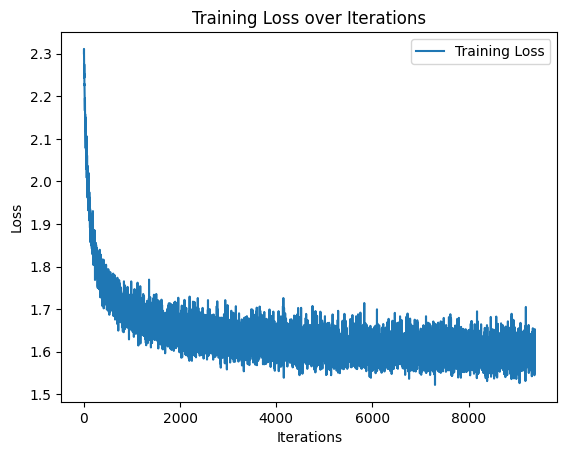

In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
###########load data###########
import mnist_loader
images, labels = mnist_loader.load_mnist(path = 'MNIST_DIR')

images = torch.from_numpy(images).to(torch.float32)
labels = torch.from_numpy(labels).to(torch.int64)

mean = torch.mean(images)
std = torch.std(images)
images = (images-mean)/std

###########train model###########
input_features = 28*28
output_features = 10
model = nn.Sequential(nn.Linear(in_features=input_features, out_features=output_features),
                      nn.Sigmoid())
loss_fn = nn.CrossEntropyLoss()
train_dataset = TensorDataset(images, labels)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training the model
num_epochs = 10
total_step = len(train_loader)
learning_rate = 0.01

loss_values = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        model.zero_grad()
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param-=learning_rate*param.grad

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
    
        # Append loss for plotting
        loss_values.append(loss.item())
    
        
plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.legend()
plt.show()

In [116]:
# calculate the number of data in the last batch
for i, (images, labels) in enumerate(train_loader):
    if i==937:
        print(images.shape)
        break

torch.Size([32, 28, 28])


In [98]:
938*64

60032

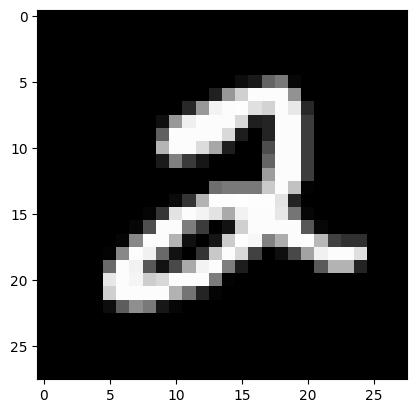

In [36]:
# show dataset
images, labels = mnist_loader.load_mnist(path = 'MNIST_DIR')
plt.imshow(images[5],cmap='gray')